# **1. Perkenalan Dataset**


Pada proyek ini, dataset yang digunakan adalah **Rice Type Classification** yang diperoleh dari situs publik Kaggle. Dataset ini memuat data fitur morfologi dari dua varietas beras yang terdaftar di Turki, yaitu **Cammeo** dan **Osmancik**.

Data ini dikumpulkan dengan memanfaatkan pemrosesan citra (image processing) untuk mengekstraksi ciri-ciri fisik dari butiran beras. Tujuan utama penggunaan dataset ini adalah untuk membangun model Machine Learning yang dapat mengklasifikasikan jenis beras secara otomatis berdasarkan karakteristik fisiknya.


**Detail Informasi Dataset:**
* **Sumber Dataset:** [Kaggle - Rice Type Classification](https://www.kaggle.com/datasets/mssmartypants/rice-type-classification)
* **Jumlah Sampel:** 3.810 baris data.
* **Kelas Target:** 2 Kelas (Cammeo dan Osmancik).
* **Fitur (Atribut):** Terdiri dari 7 fitur morfologi butir beras, antara lain:
    1.  **Area:** Luas area butiran beras (jumlah piksel).
    2.  **Perimeter:** Keliling butiran beras.
    3.  **Major_Axis_Length:** Panjang sumbu utama (terpanjang).
    4.  **Minor_Axis_Length:** Panjang sumbu minor (terpendek).
    5.  **Eccentricity:** Nilai eksentrisitas (seberapa lonjong butiran).
    6.  **Convex_Area:** Luas area cembung terkecil yang melingkupi butiran.
    7.  **Extent:** Rasio luas butiran terhadap bounding box-nya.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [16]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [17]:
df = pd.read_csv('riceClassification.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [18]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [19]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [20]:
df.isnull().sum()

,0
id,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0


In [21]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


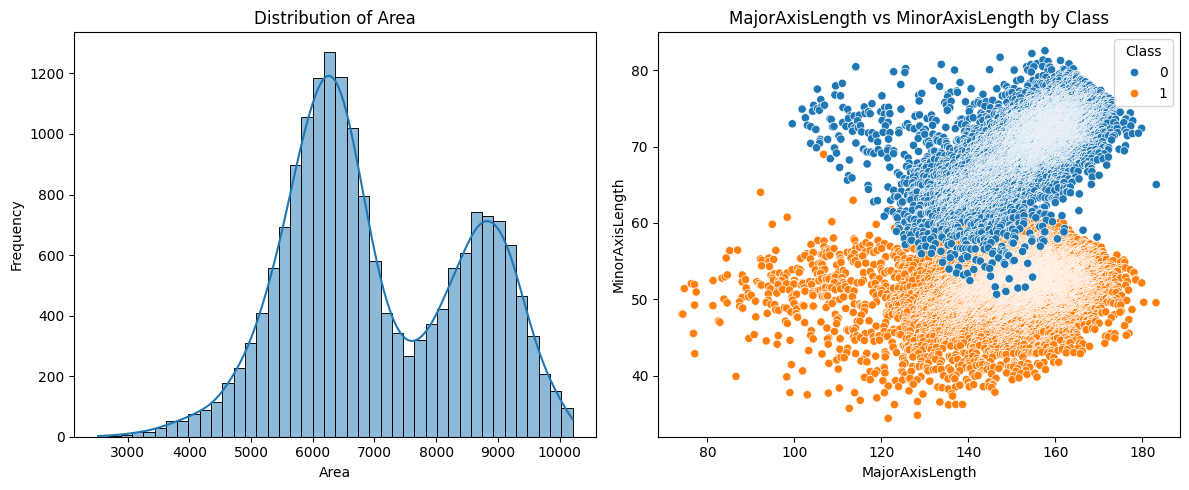

In [22]:
plt.figure(figsize=(12, 5))

# Visualisasi 1: Histogram untuk distribusi Area
plt.subplot(1, 2, 1)
sns.histplot(df['Area'], kde=True)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Visualisasi 2: Scatter plot MajorAxisLength vs MinorAxisLength berdasarkan Class
plt.subplot(1, 2, 2)
sns.scatterplot(x='MajorAxisLength', y='MinorAxisLength', hue='Class', data=df)
plt.title('MajorAxisLength vs MinorAxisLength by Class')
plt.xlabel('MajorAxisLength')
plt.ylabel('MinorAxisLength')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Drop Unnecessary Columns



In [23]:
X = df.drop(['id', 'Class'], axis=1)
y = df['Class']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Features (X) shape: (18185, 10)
Target (y) shape: (18185,)
First 5 rows of X:
   Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  4537        92.229316        64.012769      0.719916        4677   
1  2872        74.691881        51.400454      0.725553        3015   
2  3048        76.293164        52.043491      0.731211        3132   
3  3073        77.033628        51.928487      0.738639        3157   
4  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
0      76.004525  0.657536    273.085   0.764510      1.440796  
1      60.471018  0.713009    208.317   0.831658      1.453137  
2      62.296341  0.759153    210.012   0.868434      1.465950  
3      62.551300  0.783529    210.657   0.870203      1.483456  
4      68.571668  0.769375    230.332   0.874743      1.510000  
First 5 rows of y:
0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame (optional, but good for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Features (first 5 rows):")
print(X_scaled_df.head())

Scaled Features (first 5 rows):
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -1.703630        -4.803744         0.417927     -6.393938   -1.696989   
1 -2.838478        -6.220789        -0.835611     -6.209583   -2.803539   
2 -2.718519        -6.091404        -0.771700     -6.024520   -2.725641   
3 -2.701479        -6.031573        -0.783130     -5.781578   -2.708996   
4 -2.278893        -5.377799        -0.341288     -5.433479   -2.279559   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
0      -1.830049  0.391654  -2.661778   0.839588     -2.663800  
1      -3.398143  0.923070  -4.857318   1.837215     -2.635418  
2      -3.213879  1.365122  -4.799860   2.383587     -2.605950  
3      -3.188141  1.598635  -4.777995   2.409877     -2.565690  
4      -2.580390  1.463045  -4.111042   2.477331     -2.504645  


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14548, 10)
X_test shape: (3637, 10)
y_train shape: (14548,)
y_test shape: (3637,)


## Handle Outliers



In [26]:
print("\n--- Outlier Detection using IQR Method ---")
outlier_counts = {}
for column in X_scaled_df.columns:
    Q1 = X_scaled_df[column].quantile(0.25)
    Q3 = X_scaled_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X_scaled_df[(X_scaled_df[column] < lower_bound) | (X_scaled_df[column] > upper_bound)]
    outlier_counts[column] = len(outliers)
    print(f"Column '{column}': {len(outliers)} outliers identified.")

# Optionally, print total outliers or columns with most outliers
total_outliers = sum(outlier_counts.values())
print(f"\nTotal outliers across all features: {total_outliers}")



--- Outlier Detection using IQR Method ---
Column 'Area': 0 outliers identified.
Column 'MajorAxisLength': 538 outliers identified.
Column 'MinorAxisLength': 0 outliers identified.
Column 'Eccentricity': 136 outliers identified.
Column 'ConvexArea': 0 outliers identified.
Column 'EquivDiameter': 16 outliers identified.
Column 'Extent': 0 outliers identified.
Column 'Perimeter': 315 outliers identified.
Column 'Roundness': 14 outliers identified.
Column 'AspectRation': 0 outliers identified.

Total outliers across all features: 1019


In [27]:
y_reset = y.reset_index(drop=True)
df_preprocessed = pd.concat([X_scaled_df, y_reset], axis=1)

print("Shape of df_preprocessed:", df_preprocessed.shape)
print("First 5 rows of df_preprocessed:")
print(df_preprocessed.head())

Shape of df_preprocessed: (18185, 11)
First 5 rows of df_preprocessed:
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -1.703630        -4.803744         0.417927     -6.393938   -1.696989   
1 -2.838478        -6.220789        -0.835611     -6.209583   -2.803539   
2 -2.718519        -6.091404        -0.771700     -6.024520   -2.725641   
3 -2.701479        -6.031573        -0.783130     -5.781578   -2.708996   
4 -2.278893        -5.377799        -0.341288     -5.433479   -2.279559   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      -1.830049  0.391654  -2.661778   0.839588     -2.663800      1  
1      -3.398143  0.923070  -4.857318   1.837215     -2.635418      1  
2      -3.213879  1.365122  -4.799860   2.383587     -2.605950      1  
3      -3.188141  1.598635  -4.777995   2.409877     -2.565690      1  
4      -2.580390  1.463045  -4.111042   2.477331     -2.504645      1  


In [28]:
df_preprocessed.to_csv('riceClassification_preprocessing.csv', index=False)